# Rossmann Store Sales
## This project is a part of the book Learn Keras for Deep Neural Networks by Jojo Moolayil

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

E:\Aadi\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.shape

(1017209, 9)

In [3]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store = pd.read_csv("store.csv")

In [5]:
store.shape

(1115, 10)

In [6]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# inner join the two datasets 
new_df = df.merge(store, on=["Store"], how="inner")

In [8]:
new_df.shape

(1017209, 18)

In [9]:
print("distinct number of stores: " ,len(new_df["Store"].unique()))
print("average sales: ", round(new_df["Sales"].mean(),2))

distinct number of stores:  1115
average sales:  5773.82


In [10]:
new_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

### Let us extract useful features from the ["Date"] column

In [11]:
import numpy as np

In [12]:
new_df["Date"] = pd.to_datetime(new_df["Date"], infer_datetime_format=True)

In [13]:
new_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [14]:
new_df["Month"] = new_df["Date"].dt.month

In [15]:
new_df["Quarter"] = new_df["Date"].dt.quarter

In [16]:
new_df["Year"] = new_df["Date"].dt.year

In [17]:
new_df["Week"] = new_df["Date"].dt.week

In [18]:
new_df["Day"] = new_df["Date"].dt.day

In [19]:
new_df["Season"] = np.where(new_df["Month"].isin([3,4,5]),"Spring",
                    np.where(new_df["Month"].isin([6,7,8]),"Summer",
                    np.where(new_df["Month"].isin([9,10,11]),"Fall",
                    np.where(new_df["Month"].isin([12,1,2]),"Winter", "None"))))

In [20]:
new_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Week,Day,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,31,31,Summer
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,31,30,Summer
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,31,29,Summer
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,31,28,Summer
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,31,27,Summer


### Let us work on data visualization

In [21]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

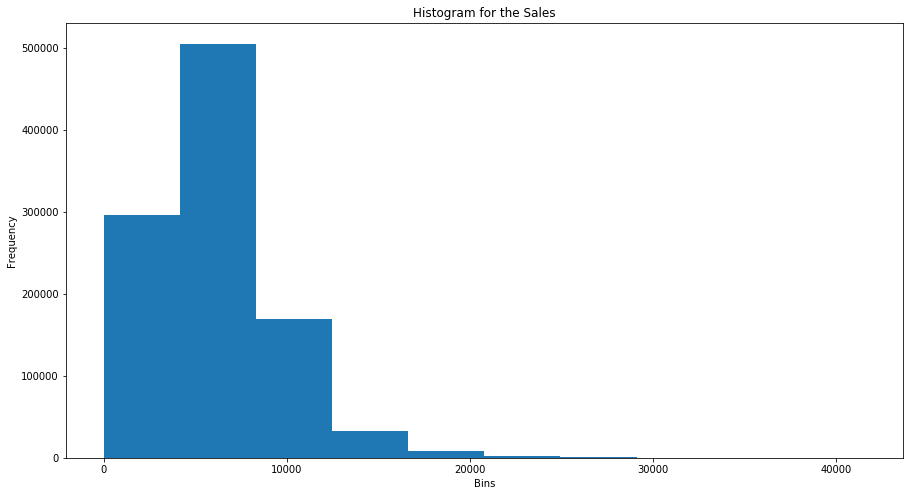

In [22]:
plt.figure(figsize=(15,8))
plt.hist(new_df["Sales"])
plt.title("Histogram for the Sales")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282C6273438>,
      dtype=object)

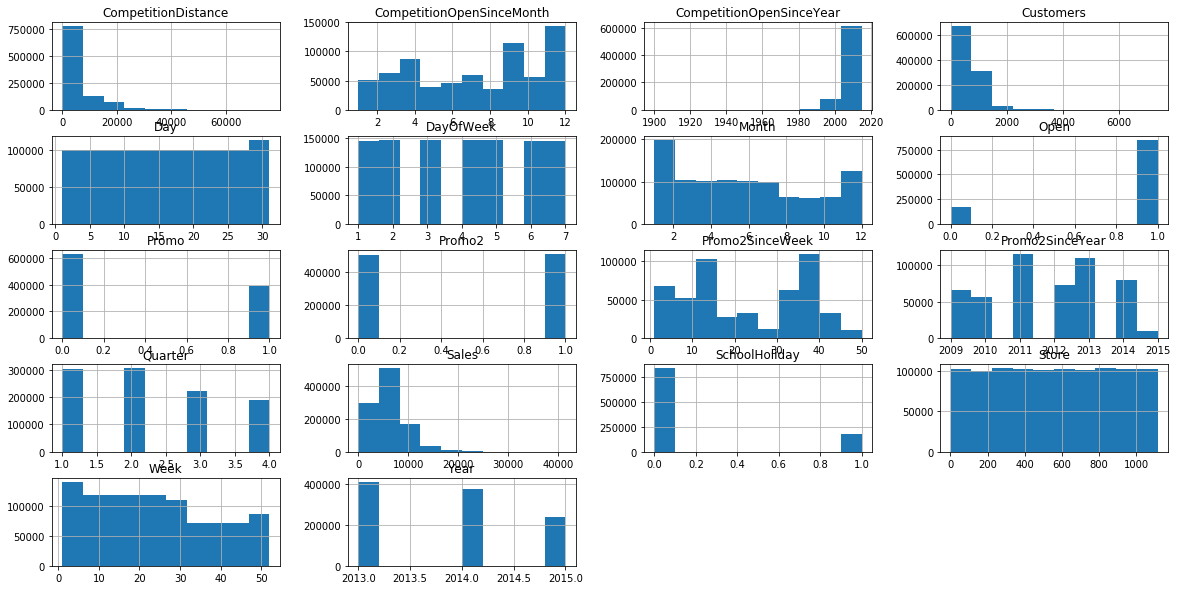

In [23]:
new_df.hist(figsize=(20,10))

In [24]:
new_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Month                             0
Quarter                           0
Year                              0
Week                              0
Day                               0
Season                            0
dtype: int64

["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceMonth", "Promo2SinceYear", "PromoInterval"] have many null values 

In [25]:
#replace the null values in ["CompetitionDistance"]
new_df["CompetitionDistance"] = new_df["CompetitionDistance"].fillna(new_df["CompetitionDistance"].mode()[0])

In [26]:
new_df["CompetitionDistance"].isnull().sum()

0

In [27]:
import seaborn as sns
sns.set(style="whitegrid")

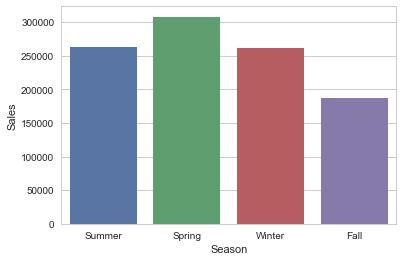

In [28]:
ax = sns.barplot(x="Season", y="Sales", data=new_df, estimator=np.size)

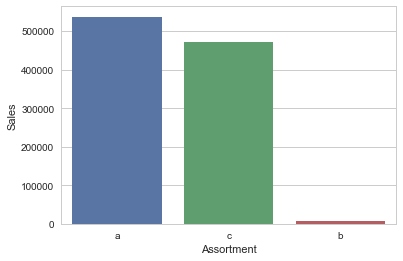

In [29]:
ax = sns.barplot(x="Assortment", y="Sales", data=new_df, estimator=np.size)

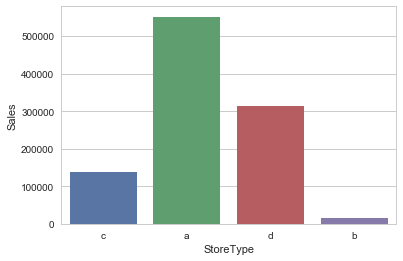

In [30]:
ax = sns.barplot(x="StoreType", y="Sales", data=new_df, estimator=np.size)

### OneHot Encoding 

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
target = ["Sales"]
numeric_columns = ["Customers","Open", "Promo", "Promo2", "StateHoliday", "SchoolHoliday", "CompetitionDistance"]
categorical_columns = ["DayOfWeek", "Quarter", "Month", "Year",  "Assortment", "Season", "StoreType"]

In [48]:
def ohe(df, col):
    le = LabelEncoder()
    a = le.fit_transform(new_df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse = False)
    column_names = [col + "_" + str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a), columns=column_names))
    
    

In [49]:
temp = new_df[numeric_columns]
for column in categorical_columns:
    temp_df = ohe(new_df, column)
    temp = pd.concat([temp,temp_df],axis = 1)

E:\Aadi\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\Aadi\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncode

In [50]:
temp.shape

(1017209, 44)

In [51]:
print(temp.columns[temp.dtypes=='object'])

Index(['StateHoliday'], dtype='object')


['StateHoliday'] has object as a data type.

In [52]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [53]:
temp["StateHoliday"] = np.where(temp["StateHoliday"] == '0', 0, 1)

In [54]:
temp.dtypes

Customers                int64
Open                     int64
Promo                    int64
Promo2                   int64
StateHoliday             int32
SchoolHoliday            int64
CompetitionDistance    float64
DayOfWeek_1            float64
DayOfWeek_2            float64
DayOfWeek_3            float64
DayOfWeek_4            float64
DayOfWeek_5            float64
DayOfWeek_6            float64
DayOfWeek_7            float64
Quarter_1              float64
Quarter_2              float64
Quarter_3              float64
Quarter_4              float64
Month_1                float64
Month_2                float64
Month_3                float64
Month_4                float64
Month_5                float64
Month_6                float64
Month_7                float64
Month_8                float64
Month_9                float64
Month_10               float64
Month_11               float64
Month_12               float64
Year_2013              float64
Year_2014              float64
Year_201

### Splitting the Data 

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(temp, new_df[target], test_size = 0.2, random_state = 2018)

In [59]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
y_train,test_size=0.1,random_state=2018)

1. split original data into 'train' and 'test'
2. further splited 'train' into 'train' and 'validation'

### Design the DNN

In [ ]:
from keras import 